This project aims at predicting hotel prices for better optimization of revenue using machine learning techniques. The dataset is collected from Expedia.com and has shape of 1324526 rows and 22 columns.

Expedia Group, Inc. is an American online travel shopping company for consumer and small business travel.

Expedia is the world’s largest online travel agency (OTA) and powers search results for millions of travel shoppers every day. In this competitive market matching users to hotel inventory is very important since users easily jump from website to website. As such, having the best ranking of hotels (“sort”) for specific users with the best integration of price competitiveness gives an OTA the best chance of winning the sale.

###Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts

###Loading the Dataset

In [2]:
data=pd.read_csv("/content/drive/MyDrive/Hotel Price Prediction/Hotel_Data_final.csv")

###Exploratory Data Analysis

In [3]:
data.dtypes, data.shape

(srch_id                          int64
 date_time                       object
 site_id                          int64
 visitor_location_country_id      int64
 prop_country_id                  int64
 prop_id                          int64
 prop_starrating                  int64
 prop_review_score              float64
 prop_brand_bool                  int64
 prop_location_score1           float64
 prop_location_score2           float64
 prop_log_historical_price      float64
 price_usd                      float64
 promotion_flag                   int64
 srch_destination_id              int64
 srch_length_of_stay              int64
 srch_booking_window              int64
 srch_adults_count                int64
 srch_children_count              int64
 srch_room_count                  int64
 srch_saturday_night_bool         int64
 random_bool                      int64
 dtype: object,
 (1324526, 22))

In [4]:
data.isna().sum()

srch_id                             0
date_time                           0
site_id                             0
visitor_location_country_id         0
prop_country_id                     0
prop_id                             0
prop_starrating                     0
prop_review_score                1888
prop_brand_bool                     0
prop_location_score1                0
prop_location_score2           291468
prop_log_historical_price           0
price_usd                           0
promotion_flag                      0
srch_destination_id                 0
srch_length_of_stay                 0
srch_booking_window                 0
srch_adults_count                   0
srch_children_count                 0
srch_room_count                     0
srch_saturday_night_bool            0
random_bool                         0
dtype: int64

In [5]:
data["srch_id"].unique()

array([119593, 548492, 348295, ..., 420135, 620122, 291740])

In [6]:
data.head()

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool
0,119593,2013-02-25 09:50:36,5,219,219,31767,2,3.5,1,1.79,...,50.00,0,14506,1,3,2,0,2,1,0
1,548492,2013-02-12 05:23:56,5,129,132,88742,4,4.0,1,1.39,...,75.00,0,26554,3,31,1,2,1,1,0
2,348295,2012-12-10 17:02:56,5,219,219,41438,3,4.5,1,2.40,...,129.00,0,16550,1,0,2,0,1,0,0
3,39250,2013-01-26 13:45:18,29,220,132,108768,4,4.0,1,1.95,...,80.78,1,1815,3,5,2,1,1,1,0
4,509068,2013-05-26 12:50:23,14,100,100,78377,0,4.0,1,3.74,...,148.28,0,20216,1,6,2,0,1,1,1


###Removing Outliers from data

{'whiskers': [<matplotlib.lines.Line2D at 0x7e7fb8e502b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e7fb8e507f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e7fb8e0ffd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e7fb8e50d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e7fb8e50fd0>],
 'means': []}

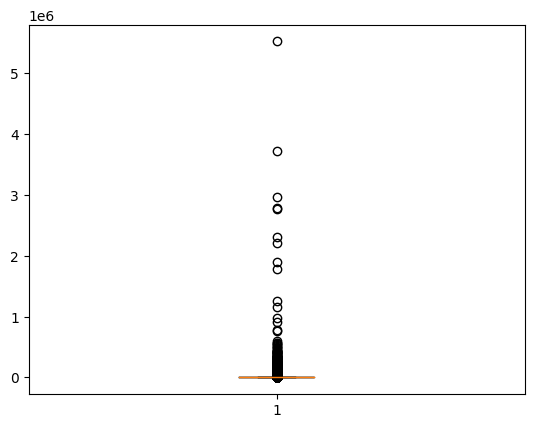

In [7]:
plt.boxplot(data["price_usd"])

In [8]:
Q1 = data['price_usd'].quantile(0.25)
Q3 = data['price_usd'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_filtered = data[(data['price_usd'] >= lower_bound) & (data['price_usd'] <= upper_bound)]

<Axes: ylabel='price_usd'>

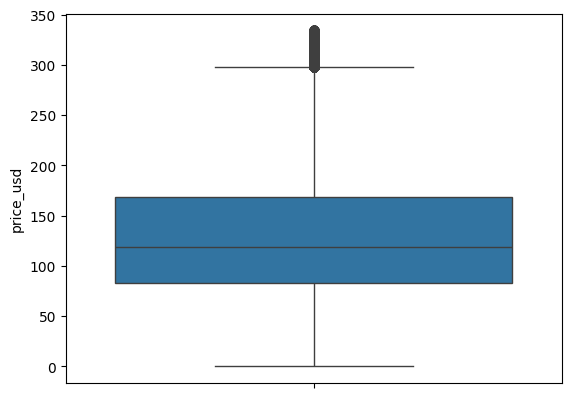

In [9]:
sns.boxplot(data_filtered["price_usd"])

###Converting timestamp data into numerical features

In [ ]:
import datetime
data_filtered["date_time"]=pd.to_datetime(data_filtered["date_time"],format = "%Y-%m-%d %H:%M:%S")
data_filtered["month"]=data_filtered["date_time"].dt.month
data_filtered["Year"]=data_filtered["date_time"].dt.year
data_filtered["day_of_week"]=data_filtered["date_time"].dt.dayofweek
data_filtered["hour"]=data_filtered["date_time"].dt.hour
data_filtered["min"]=data_filtered["date_time"].dt.minute


In [11]:
data_filtered.isna().sum()

srch_id                             0
date_time                           0
site_id                             0
visitor_location_country_id         0
prop_country_id                     0
prop_id                             0
prop_starrating                     0
prop_review_score                1819
prop_brand_bool                     0
prop_location_score1                0
prop_location_score2           278450
prop_log_historical_price           0
price_usd                           0
promotion_flag                      0
srch_destination_id                 0
srch_length_of_stay                 0
srch_booking_window                 0
srch_adults_count                   0
srch_children_count                 0
srch_room_count                     0
srch_saturday_night_bool            0
random_bool                         0
month                               0
Year                                0
day_of_week                         0
hour                                0
min         

In [12]:
data_filtered['Year'].unique()

array([2013, 2012])

###Imputing values inplace of null values for columns "prop_review_score" and "prop_location_score2"

In [13]:
prop_review_score_mean=data_filtered["prop_review_score"].mean()
prop_location_score2_mean=data_filtered["prop_location_score2"].mean()
data_filtered["prop_review_score"]=data_filtered["prop_review_score"].fillna(prop_review_score_mean)
data_filtered["prop_location_score2"]=data_filtered["prop_location_score2"].fillna(prop_location_score2_mean)

<ipython-input-13-4180ffe2697b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered["prop_review_score"]=data_filtered["prop_review_score"].fillna(prop_review_score_mean)
<ipython-input-13-4180ffe2697b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered["prop_location_score2"]=data_filtered["prop_location_score2"].fillna(prop_location_score2_mean)


In [14]:
data_filtered.isna().sum()

srch_id                        0
date_time                      0
site_id                        0
visitor_location_country_id    0
prop_country_id                0
prop_id                        0
prop_starrating                0
prop_review_score              0
prop_brand_bool                0
prop_location_score1           0
prop_location_score2           0
prop_log_historical_price      0
price_usd                      0
promotion_flag                 0
srch_destination_id            0
srch_length_of_stay            0
srch_booking_window            0
srch_adults_count              0
srch_children_count            0
srch_room_count                0
srch_saturday_night_bool       0
random_bool                    0
month                          0
Year                           0
day_of_week                    0
hour                           0
min                            0
dtype: int64

###Splitting of Dataset for training and testing

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [16]:
x=data_filtered.drop(["price_usd","date_time"],axis=1)
y=data_filtered["price_usd"]
x.shape,y.shape

((1246635, 25), (1246635,))

In [17]:
train_x,test_x,train_y,test_y=tts(x,y,random_state=1)

In [18]:
train_x_scaled=scaler.fit_transform(train_x)
test_x_scaled=scaler.fit_transform(test_x)

###Implementation Of Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression as LR
from sklearn import metrics
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score as r2

In [15]:
lr=LR()
lr.fit(train_x_scaled,train_y)

train_predict = lr.predict(train_x_scaled)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error is', k )
test_predict = lr.predict(test_x_scaled)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error is', k )

Training Mean Absolute Error is 42.98371112342087
Test Mean Absolute Error is 42.945877392567965


In [16]:


a1 = mse(train_y, train_predict)
b1 = mse(train_y, train_predict, squared = False)
c1 = r2(train_y, train_predict)
e1 = mae(train_y, train_predict)

a2 = mse(test_y, test_predict)
b2 = mse(test_y, test_predict, squared = False)
c2 = r2(test_y, test_predict)
e2 = mae(test_y, test_predict)

print(f"Training Data Analysis:\n\nMean Square Error : {a1:.2f}\nRoot Mean Square Error : {b1:.2f}\nR2 Score : {c1:.2f}\nMean Absolute Error : {e1:.2f}\n")
print(f"Test Data Analysis:\n\nMean Square Error : {a2:.2f}\nRoot Mean Square Error : {b2:.2f}\nR2 Score : {c2:.2f}\nMean Absolute Error : {e2:.2f}")

Training Data Analysis:

Mean Square Error : 3086.99
Root Mean Square Error : 55.56
R2 Score : 0.30
Mean Absolute Error : 42.98

Test Data Analysis:

Mean Square Error : 3082.51
Root Mean Square Error : 55.52
R2 Score : 0.29
Mean Absolute Error : 42.95


###Implementation Of Linear Regression with Lasso regularisation

In [17]:
from sklearn.linear_model import Lasso, Ridge, SGDRegressor

regressor = Lasso(alpha=0.007)

regressor.fit(train_x_scaled,train_y)

y_train_pred = regressor.predict(train_x_scaled)
y_test_pred = regressor.predict(test_x_scaled)

a1 = mse(train_y, y_train_pred)
b1 = mse(train_y, y_train_pred, squared = False)
c1 = r2(train_y, y_train_pred)
e1 = mae(train_y, y_train_pred)

a2 = mse(test_y, y_test_pred)
b2 = mse(test_y, y_test_pred, squared = False)
c2 = r2(test_y, y_test_pred)
e2 = mae(test_y, y_test_pred)

print(f"Training Data Analysis:\n\nMean Square Error : {a1:.2f}\nRoot Mean Square Error : {b1:.2f}\nR2 Score : {c1:.2f}\nMean Absolute Error : {e1:.2f}\n")
print(f"Test Data Analysis:\n\nMean Square Error : {a2:.2f}\nRoot Mean Square Error : {b2:.2f}\nR2 Score : {c2:.2f}\nMean Absolute Error : {e2:.2f}")

Training Data Analysis:

Mean Square Error : 3086.99
Root Mean Square Error : 55.56
R2 Score : 0.30
Mean Absolute Error : 42.98

Test Data Analysis:

Mean Square Error : 3082.54
Root Mean Square Error : 55.52
R2 Score : 0.29
Mean Absolute Error : 42.95


###Implementation Of Linear Regression with Ridge regularisation

In [18]:
regressor = Ridge(alpha=0.007)

regressor.fit(train_x_scaled,train_y)

y_train_pred = regressor.predict(train_x_scaled)
y_test_pred = regressor.predict(test_x_scaled)

a1 = mse(train_y, y_train_pred)
b1 = mse(train_y, y_train_pred, squared = False)
c1 = r2(train_y, y_train_pred)
e1 = mae(train_y, y_train_pred)

a2 = mse(test_y, y_test_pred)
b2 = mse(test_y, y_test_pred, squared = False)
c2 = r2(test_y, y_test_pred)
e2 = mae(test_y, y_test_pred)

print(f"Training Data Analysis:\n\nMean Square Error : {a1:.2f}\nRoot Mean Square Error : {b1:.2f}\nR2 Score : {c1:.2f}\nMean Absolute Error : {e1:.2f}\n")
print(f"Test Data Analysis:\n\nMean Square Error : {a2:.2f}\nRoot Mean Square Error : {b2:.2f}\nR2 Score : {c2:.2f}\nMean Absolute Error : {e2:.2f}")

Training Data Analysis:

Mean Square Error : 3086.99
Root Mean Square Error : 55.56
R2 Score : 0.30
Mean Absolute Error : 42.98

Test Data Analysis:

Mean Square Error : 3082.51
Root Mean Square Error : 55.52
R2 Score : 0.29
Mean Absolute Error : 42.95


###Implementation Of Decision Tree Regressor

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

decision_tree = DecisionTreeRegressor(random_state=3)

decision_tree.fit(train_x_scaled,train_y)

predictions_train = decision_tree.predict(train_x_scaled)
predictions_test = decision_tree.predict(test_x_scaled)


In [27]:
a1 = mse(train_y, predictions_train)
b1 = mse(train_y, predictions_train, squared = False)
c1 = r2(train_y, predictions_train)
e1 = mae(train_y, predictions_train)

a2 = mse(test_y, predictions_test)
b2 = mse(test_y, predictions_test, squared = False)
c2 = r2(test_y, predictions_test)
e2 = mae(test_y, predictions_test)

print(f"Training Data Analysis:\n\nMean Square Error : {a1:.2f}\nRoot Mean Square Error : {b1:.2f}\nR2 Score : {c1:.2f}\nMean Absolute Error : {e1:.2f}\n")
print(f"Test Data Analysis:\n\nMean Square Error : {a2:.2f}\nRoot Mean Square Error : {b2:.2f}\nR2 Score : {c2:.2f}\nMean Absolute Error : {e2:.2f}")

Training Data Analysis:

Mean Square Error : 0.00
Root Mean Square Error : 0.00
R2 Score : 1.00
Mean Absolute Error : 0.00

Test Data Analysis:

Mean Square Error : 3097.06
Root Mean Square Error : 55.65
R2 Score : 0.29
Mean Absolute Error : 39.09


###Finding best hyperparameters for Decision Tree Regressor

In [28]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features':['sqrt',None]
}

grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(train_x_scaled,train_y)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Use the best model found by GridSearchCV
best_model = grid_search.best_estimator_

predictions_test = best_model.predict(test_x_scaled)

a2 = mse(test_y, predictions_test)
b2 = mse(test_y, predictions_test, squared = False)
c2 = r2(test_y, predictions_test)
e2 = mae(test_y, predictions_test)

print(f"Test Data Analysis:\n\nMean Square Error : {a2:.2f}\nRoot Mean Square Error : {b2:.2f}\nR2 Score : {c2:.2f}\nMean Absolute Error : {e2:.2f}")

Best Hyperparameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Test Data Analysis:

Mean Square Error : 1857.95
Root Mean Square Error : 43.10
R2 Score : 0.57
Mean Absolute Error : 31.38


######Implementation Of Random Forest Regressor

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Define the Random Forest model
random_forest = RandomForestRegressor(n_estimators=10,random_state=7)

random_forest.fit(train_x_scaled,train_y)

predictions_train = random_forest.predict(train_x_scaled)
predictions_test = random_forest.predict(test_x_scaled)

a1 = mse(train_y, predictions_train)
b1 = mse(train_y, predictions_train, squared = False)
c1 = r2(train_y, predictions_train)
e1 = mae(train_y, predictions_train)

a2 = mse(test_y, predictions_test)
b2 = mse(test_y, predictions_test, squared = False)
c2 = r2(test_y, predictions_test)
e2 = mae(test_y, predictions_test)

print(f"Training Data Analysis:\n\nMean Square Error : {a1:.2f}\nRoot Mean Square Error : {b1:.2f}\nR2 Score : {c1:.2f}\nMean Absolute Error : {e1:.2f}\n")
print(f"Test Data Analysis:\n\nMean Square Error : {a2:.2f}\nRoot Mean Square Error : {b2:.2f}\nR2 Score : {c2:.2f}\nMean Absolute Error : {e2:.2f}")

Training Data Analysis:

Mean Square Error : 296.52
Root Mean Square Error : 17.22
R2 Score : 0.93
Mean Absolute Error : 11.66

Test Data Analysis:

Mean Square Error : 1645.13
Root Mean Square Error : 40.56
R2 Score : 0.62
Mean Absolute Error : 29.31


###Implementation Of Neural Network using sklearn library

In [ ]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(200,50), max_iter=100, activation='logistic', batch_size=2000)

model.fit(train_x_scaled,train_y)

In [21]:
predictions_train = model.predict(train_x_scaled)
predictions_test = model.predict(test_x_scaled)

a1 = mse(train_y, predictions_train)
b1 = mse(train_y, predictions_train, squared = False)
c1 = r2(train_y, predictions_train)
e1 = mae(train_y, predictions_train)

a2 = mse(test_y, predictions_test)
b2 = mse(test_y, predictions_test, squared = False)
c2 = r2(test_y, predictions_test)
e2 = mae(test_y, predictions_test)

print(f"Training Data Analysis:\n\nMean Square Error : {a1:.2f}\nRoot Mean Square Error : {b1:.2f}\nR2 Score : {c1:.2f}\nMean Absolute Error : {e1:.2f}\n")
print(f"Test Data Analysis:\n\nMean Square Error : {a2:.2f}\nRoot Mean Square Error : {b2:.2f}\nR2 Score : {c2:.2f}\nMean Absolute Error : {e2:.2f}")


Training Data Analysis:

Mean Square Error : 1780.50
Root Mean Square Error : 42.20
R2 Score : 0.59
Mean Absolute Error : 30.78

Test Data Analysis:

Mean Square Error : 1807.58
Root Mean Square Error : 42.52
R2 Score : 0.59
Mean Absolute Error : 30.95


###Implementation Of Neural Network using Keras library

In [20]:
from keras.layers import Dense, InputLayer
from keras.models import Sequential

In [27]:
model=Sequential()
model.add(InputLayer(input_shape=(train_x.shape[1],)))
model.add(Dense(units=100, activation="relu"))
model.add(Dense(units=100, activation="relu"))
model.add(Dense(units=100, activation="relu"))
model.add(Dense(units=1, activation="linear"))

In [28]:
model.compile(optimizer="adam",loss="mean_squared_error", metrics=["mse"])

In [29]:
model.fit(train_x, train_y, epochs=50)

Epoch 1/50
29218/29218 [==============================] - 58s 2ms/step - loss: 118139.1406 - mse: 118139.1406
Epoch 2/50
29218/29218 [==============================] - 57s 2ms/step - loss: 4422.2188 - mse: 4422.2188
Epoch 3/50
29218/29218 [==============================] - 57s 2ms/step - loss: 4258.6514 - mse: 4258.6514
Epoch 4/50
29218/29218 [==============================] - 58s 2ms/step - loss: 4174.3066 - mse: 4174.3066
Epoch 5/50
29218/29218 [==============================] - 56s 2ms/step - loss: 4050.6697 - mse: 4050.6697
Epoch 6/50
29218/29218 [==============================] - 56s 2ms/step - loss: 3791.8311 - mse: 3791.8311
Epoch 7/50
29218/29218 [==============================] - 55s 2ms/step - loss: 3660.3811 - mse: 3660.3811
Epoch 8/50
29218/29218 [==============================] - 55s 2ms/step - loss: 3594.9456 - mse: 3594.9456
Epoch 9/50
29218/29218 [==============================] - 57s 2ms/step - loss: 3535.5374 - mse: 3535.5374
Epoch 10/50
29218/29218 [=================

In [30]:
predictions_train = model.predict(train_x)
predictions_test = model.predict(test_x)

a1 = mse(train_y, predictions_train)
b1 = mse(train_y, predictions_train, squared = False)
c1 = r2(train_y, predictions_train)
e1 = mae(train_y, predictions_train)

a2 = mse(test_y, predictions_test)
b2 = mse(test_y, predictions_test, squared = False)
c2 = r2(test_y, predictions_test)
e2 = mae(test_y, predictions_test)

print(f"Training Data Analysis:\n\nMean Square Error : {a1:.2f}\nRoot Mean Square Error : {b1:.2f}\nR2 Score : {c1:.2f}\nMean Absolute Error : {e1:.2f}\n")
print(f"Test Data Analysis:\n\nMean Square Error : {a2:.2f}\nRoot Mean Square Error : {b2:.2f}\nR2 Score : {c2:.2f}\nMean Absolute Error : {e2:.2f}")

9740/9740 [==============================] - 13s 1ms/step
Training Data Analysis:

Mean Square Error : 2960.26
Root Mean Square Error : 54.41
R2 Score : 0.32
Mean Absolute Error : 41.91

Test Data Analysis:

Mean Square Error : 2954.13
Root Mean Square Error : 54.35
R2 Score : 0.32
Mean Absolute Error : 41.86
